In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from math import pi
from random import randint
import numpy.random as rand
import matplotlib.colors as colors
cconverter=colors.ColorConverter()

In [2]:
from mpl_toolkits.mplot3d import Axes3D

In [3]:
lat = np.linspace(-np.pi/2, np.pi/2, 120)
lon = np.linspace(-np.pi,   np.pi,  120)
r   = 100.
x3d = r * np.outer(np.cos(np.pi+lon), np.sin(np.pi/2 + lat))
y3d = r * np.outer(np.sin(np.pi+lon), np.sin(np.pi/2 + lat))
z3d = r * np.outer(np.ones(np.size(lon)), np.cos(np.pi/2 + lat))

In [4]:
f_surface = 0.5

In [5]:
el_colors = np.full(x3d.shape, "y", dtype=str)
N_elems = len(lat)*len(lon)
N_spots = int(f_surface*N_elems)
for n in range(N_spots):
    x_spot = rand.randint(0, x3d.shape[0])
    y_spot = rand.randint(0, x3d.shape[1])
    
    el_colors[x_spot, y_spot] = "r"

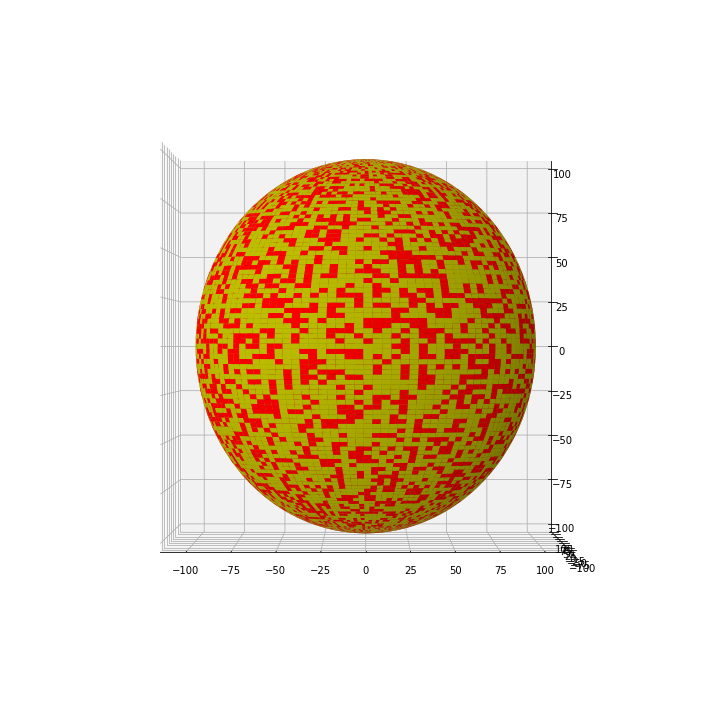

In [6]:
fig = plt.figure(figsize=(10,10))

ax  = fig.add_subplot(111, projection="3d")

sp = ax.plot_surface(x3d, y3d, z3d, rstride=1, cstride=1, facecolors=el_colors, linewidth=0)

ax.view_init(azim=270,elev=0)

fig.tight_layout()

In [7]:
fluxes = np.empty((lon.shape[0], lat.shape[0], 1))
specks = np.empty((lon.shape[0], lat.shape[0], 1), dtype="U1")

for i in range(len(lon)):
    for j in range(len(lat)):
        if el_colors[i, j] == 'r':
            b = 0.8
        else:
            b = 1.0
        fluxes[i, j] = b
        specks[i, j] = el_colors[i, j]
        
#for i in range(90):
#    for j in range(60):    
#        pl=plt.plot(x3d[i], y3d[j], 's', ms = 11.0, c=specks[30+i, j][0])
#        plt.plot(x3d[i], -3d[j], 's', ms = 11.0, c=specks[30+i, j][0])
#        plt.ylim(top=100)
#        plt.ylim(bottom = -100)

In [8]:
x  = r*np.sin(lon+np.pi/2)
y  = r*np.sin(lat)
zp = 30
for i in range(120):
    for j in range(120):
        if zp + i < x.shape[0]:
            k = zp + i
        elif zp + i >= 120:
            k = i - (x.shape[0] - zp)
        else:
            print("Whoops")
            break
        #pl=plt.plot(x[i], -y[j], 's', ms = 9.0, c=specks[k, j][0])
        #plt.ylim(-r, r)
        #plt.xlim(-r, r)

In [17]:
deltaX = []
deltaY = []
Area = []
fpc = []
f_received =[]
spotratio = .


for j in range(len(x)):
    if x[j] > 0:
        for i in range(len(lon)-1):
            deltaX.append(np.sqrt((x[j]-x[j+1])**2))
    
        for i in range(len(lat)-1):
            deltaY.append(np.sqrt((y[j]-y[j+1])**2))
    
        for i in range(len(lon)-1):
            Area.append(deltaX[j]*deltaY[j])
    
        for i in range(119):
            if el_colors[i, j] == 'r':
                fpc.append(spotratio*Area[i])
            else:
                fpc.append(1*Area[i])

f_received = sum(fpc)

print(f_received)

print(x)

57706.81236541966
[-100.          -99.86064103  -99.44295255  -98.74809872  -97.77801623
  -96.53540887  -95.02374001  -93.24722294  -91.21080914  -88.92017445
  -86.3817033   -83.60247084  -80.59022329  -77.35335635  -73.90089172
  -70.24245206  -66.38823408  -62.34898019  -58.1359485   -53.7608815
  -49.23597328  -44.57383558  -39.7874626   -34.89019482  -29.89568181
  -24.81784418  -19.67083476  -14.4689992    -9.22683595   -3.95895584
    1.31995858    6.59519404   11.85204752   17.07586721   22.2520934
   27.36629901   32.40422984   37.35184426   42.1953524    46.92125452
   51.51637869   55.96791748   60.26346364   64.39104472   68.3391564
   72.0967946    75.65348611   78.99931778   82.12496418   85.02171357
   87.6814922    90.09688679   92.26116519   94.16829518   95.81296124
   97.19057939   98.29730997   99.13006831   99.68653337   99.96515419
   99.96515419   99.68653337   99.13006831   98.29730997   97.19057939
   95.81296124   94.16829518   92.26116519   90.09688679   87.